In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('dataset2.csv')
df.head()

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.104787               Working   
2  52.321403        8.353354  Commercial associate   
3  61.504343        0.000000             Pensioner   
4  46.193967        2.105450               Working   

                  Education_type         Family_status       Housing_type  \
0               Higher education        Civil marriage   Rented apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education             Separated  House / apartment   
4               Higher education               Married  House / apartment   

  Occupation_type  Target  
0           Other       1  
1  Security staff       0  
2     Sales staff       0  
3           Other       0  
4     Accountants       0

In [3]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
df.describe()

ID       Gender      Own_car  Own_property   Work_phone  \
count  9.709000e+03  9709.000000  9709.000000   9709.000000  9709.000000   
mean   5.076105e+06     0.348749     0.367700      0.671542     0.217427   
std    4.080270e+04     0.476599     0.482204      0.469677     0.412517   
min    5.008804e+06     0.000000     0.000000      0.000000     0.000000   
25%    5.036955e+06     0.000000     0.000000      0.000000     0.000000   
50%    5.069449e+06     0.000000     0.000000      1.000000     0.000000   
75%    5.112986e+06     1.000000     1.000000      1.000000     0.000000   
max    5.150479e+06     1.000000     1.000000      1.000000     1.000000   

             Phone        Email   Unemployed  Num_children   Num_family  \
count  9709.000000  9709.000000  9709.000000   9709.000000  9709.000000   
mean      0.287671     0.087548     0.174683      0.422804     2.182614   
std       0.452700     0.282650     0.379716      0.767019     0.932918   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     2.000000   
50%       0.000000     0.000000     0.000000      0.000000     2.000000   
75%       1.000000     0.000000     0.000000      1.000000     3.000000   
max       1.000000     1.000000     1.000000     19.000000    20.000000   

       Account_length  Total_income          Age  Years_employed       Target  
count     9709.000000  9.709000e+03  9709.000000     9709.000000  9709.000000  
mean        27.270059  1.812282e+05    43.784093        5.664730     0.132145  
std         16.648057  9.927731e+04    11.625768        6.342241     0.338666  
min          0.000000  2.700000e+04    20.504186        0.000000     0.000000  
25%         13.000000  1.125000e+05    34.059563        0.928150     0.000000  
50%         26.000000  1.575000e+05    42.741466        3.761884     0.000000  
75%         41.000000  2.250000e+05    53.567151        8.200031     0.000000  
max         60.000000  1.575000e+06    68.863837       43.020733     1.000000

/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/si

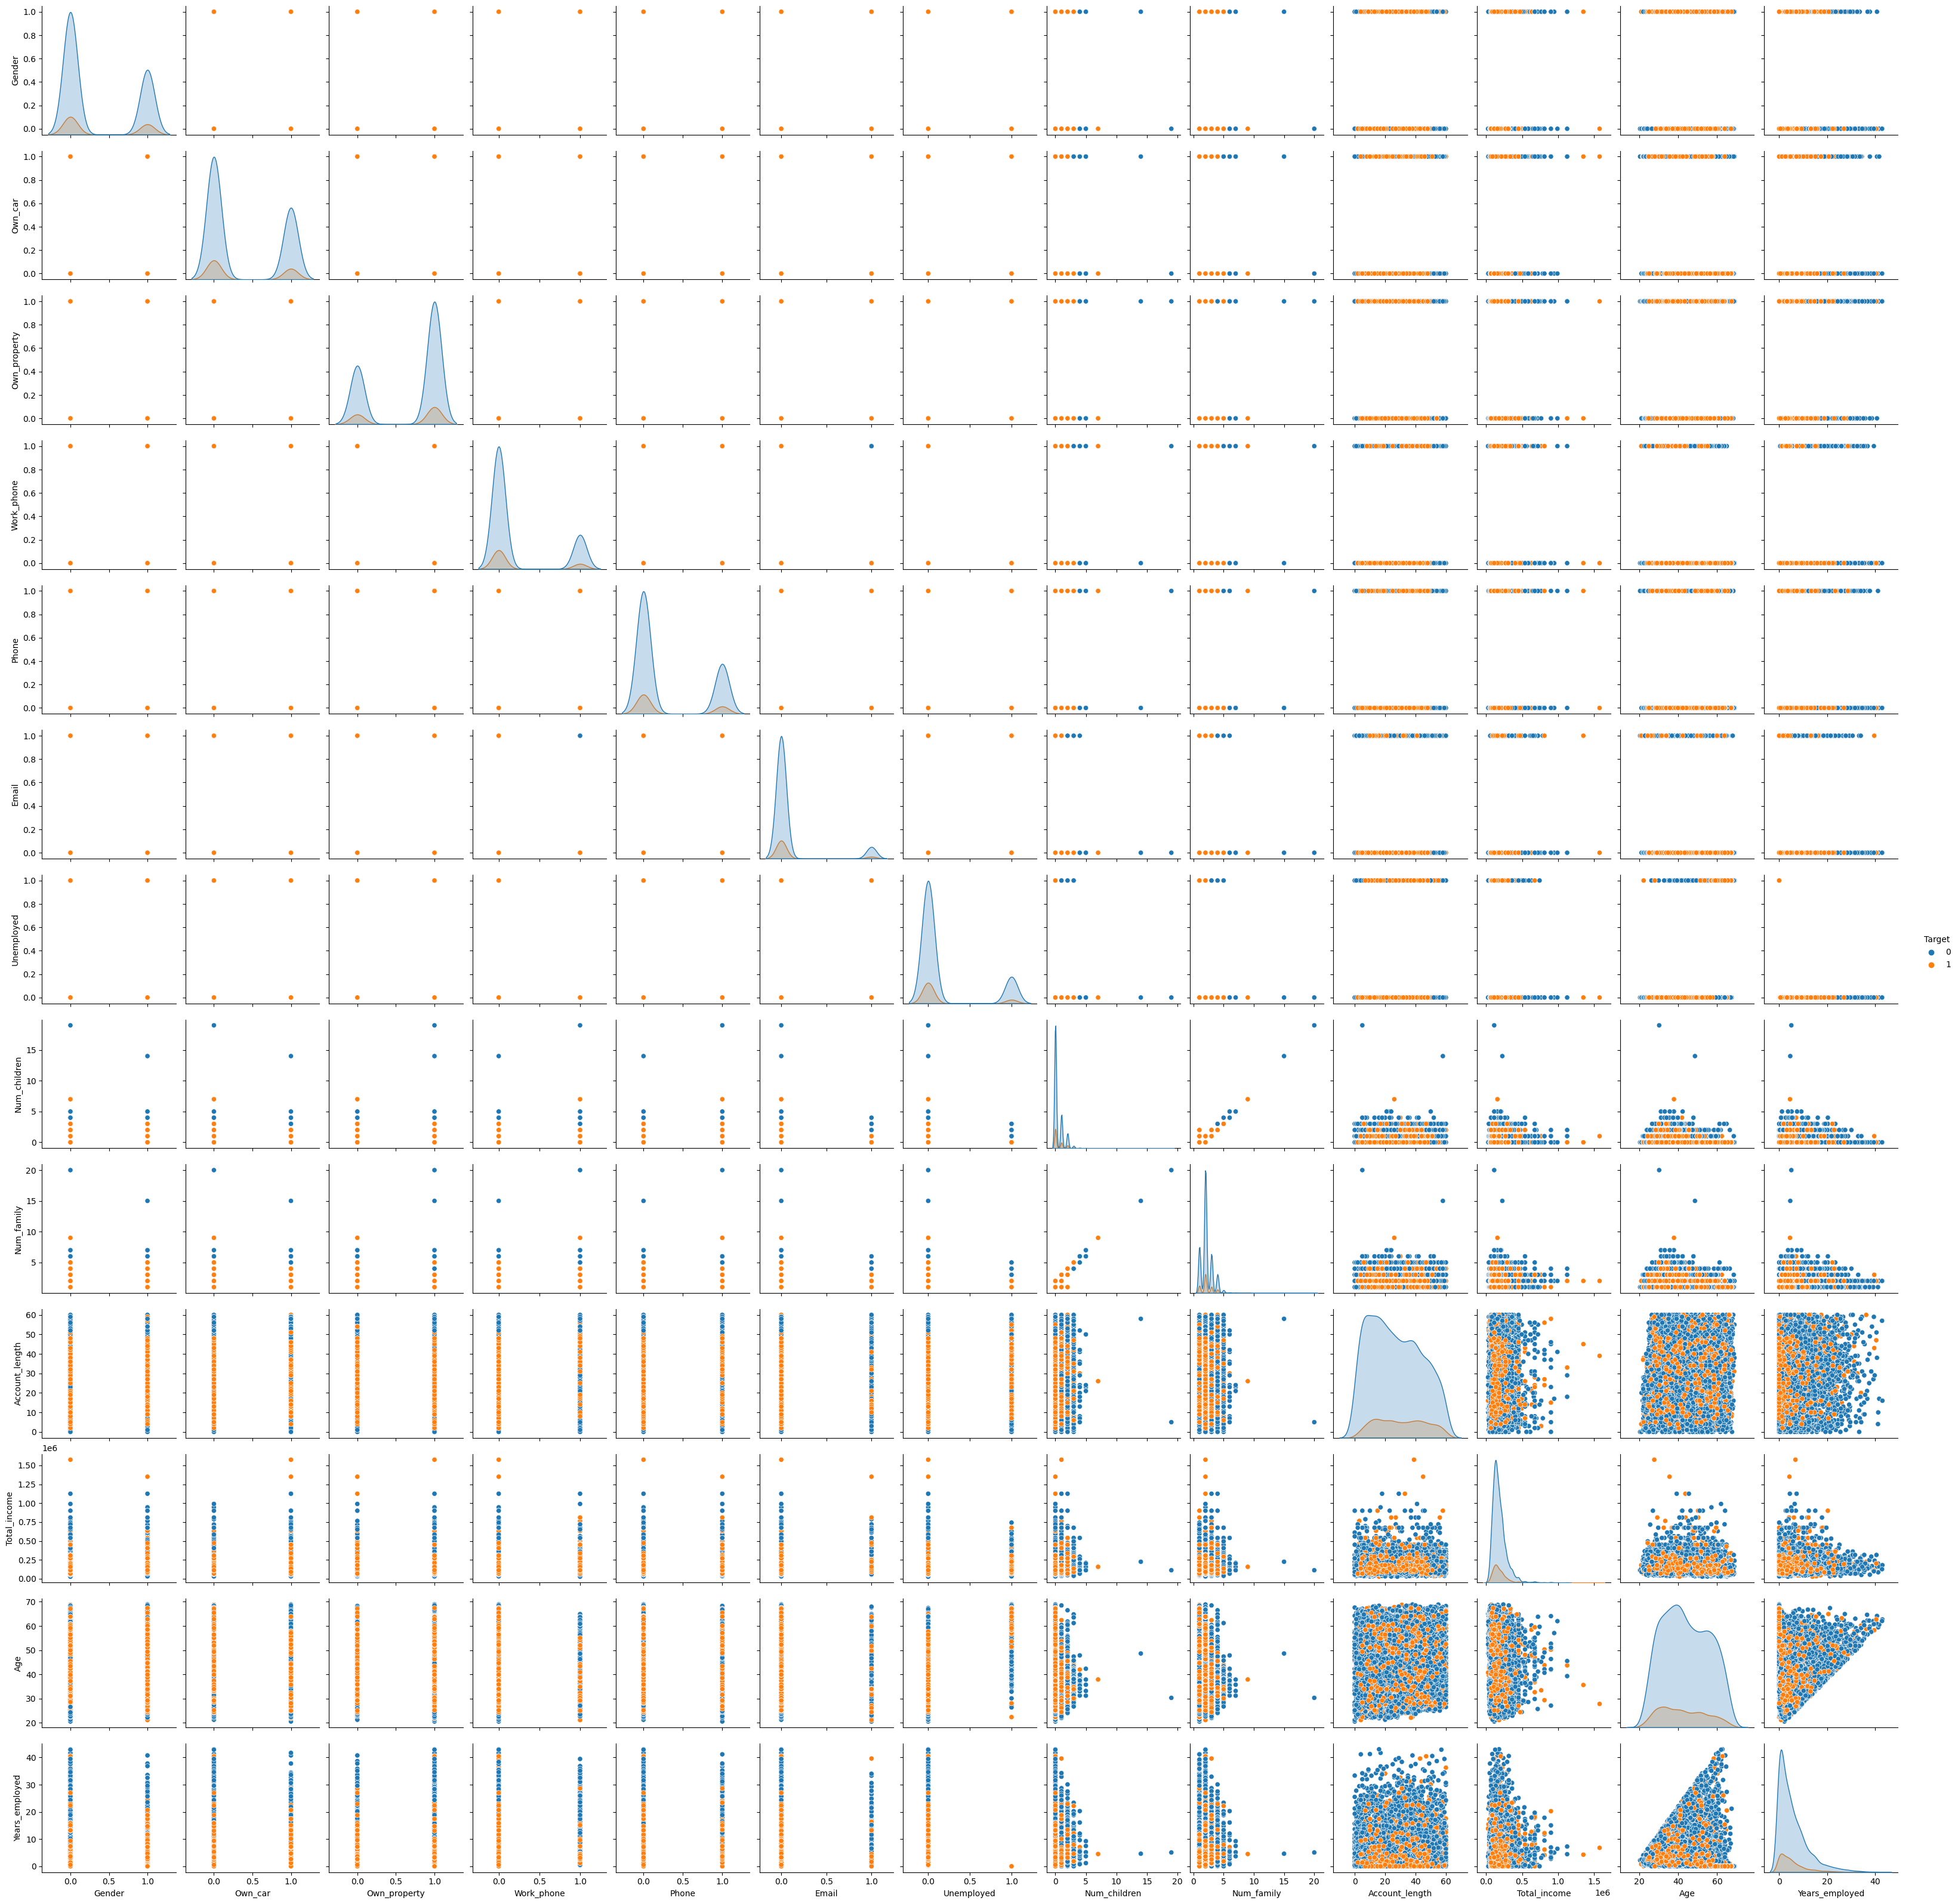

In [5]:
# Limiting the data
df2 = df[['Gender', 'Own_car', 'Own_property','Work_phone', 'Phone', 'Email','Unemployed','Num_children','Num_family','Account_length','Total_income','Age','Years_employed',
          'Target']]
df3 = df[['Age', 'Years_employed', 'Total_income', 'Account_length', 'Num_children', 'Num_family','Target']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(df2, hue = 'Target', diag_kws={'bw': 0.2})

In [6]:
df2.describe()

Gender      Own_car  Own_property   Work_phone        Phone  \
count  9709.000000  9709.000000   9709.000000  9709.000000  9709.000000   
mean      0.348749     0.367700      0.671542     0.217427     0.287671   
std       0.476599     0.482204      0.469677     0.412517     0.452700   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.000000      0.000000     0.000000     0.000000   
50%       0.000000     0.000000      1.000000     0.000000     0.000000   
75%       1.000000     1.000000      1.000000     0.000000     1.000000   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

             Email   Unemployed  Num_children   Num_family  Account_length  \
count  9709.000000  9709.000000   9709.000000  9709.000000     9709.000000   
mean      0.087548     0.174683      0.422804     2.182614       27.270059   
std       0.282650     0.379716      0.767019     0.932918       16.648057   
min       0.000000     0.000000      0.000000     1.000000        0.000000   
25%       0.000000     0.000000      0.000000     2.000000       13.000000   
50%       0.000000     0.000000      0.000000     2.000000       26.000000   
75%       0.000000     0.000000      1.000000     3.000000       41.000000   
max       1.000000     1.000000     19.000000    20.000000       60.000000   

       Total_income          Age  Years_employed       Target  
count  9.709000e+03  9709.000000     9709.000000  9709.000000  
mean   1.812282e+05    43.784093        5.664730     0.132145  
std    9.927731e+04    11.625768        6.342241     0.338666  
min    2.700000e+04    20.504186        0.000000     0.000000  
25%    1.125000e+05    34.059563        0.928150     0.000000  
50%    1.575000e+05    42.741466        3.761884     0.000000  
75%    2.250000e+05    53.567151        8.200031     0.000000  
max    1.575000e+06    68.863837       43.020733     1.000000

In [7]:
# # Create a pair plot
# sns.pairplot(df3)
# plt.suptitle('Numerical Variable Pair Plot', y=1.00)  # Adjust the title position
# plt.show()

In [8]:
correlation_matrix = df.corr()
df3.corr()

Age  Years_employed  Total_income  Account_length  \
Age             1.000000       -0.015183     -0.064262        0.088337   
Years_employed -0.015183        1.000000      0.087641        0.083700   
Total_income   -0.064262        0.087641      1.000000        0.023211   
Account_length  0.088337        0.083700      0.023211        1.000000   
Num_children   -0.322574        0.039159      0.031950       -0.009064   
Num_family     -0.275471        0.055838      0.028992        0.012132   
Target         -0.043654       -0.009346      0.018784        0.077492   

                Num_children  Num_family    Target  
Age                -0.322574   -0.275471 -0.043654  
Years_employed      0.039159    0.055838 -0.009346  
Total_income        0.031950    0.028992  0.018784  
Account_length     -0.009064    0.012132  0.077492  
Num_children        1.000000    0.889970  0.011715  
Num_family          0.889970    1.000000  0.007077  
Target              0.011715    0.007077  1.000000

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

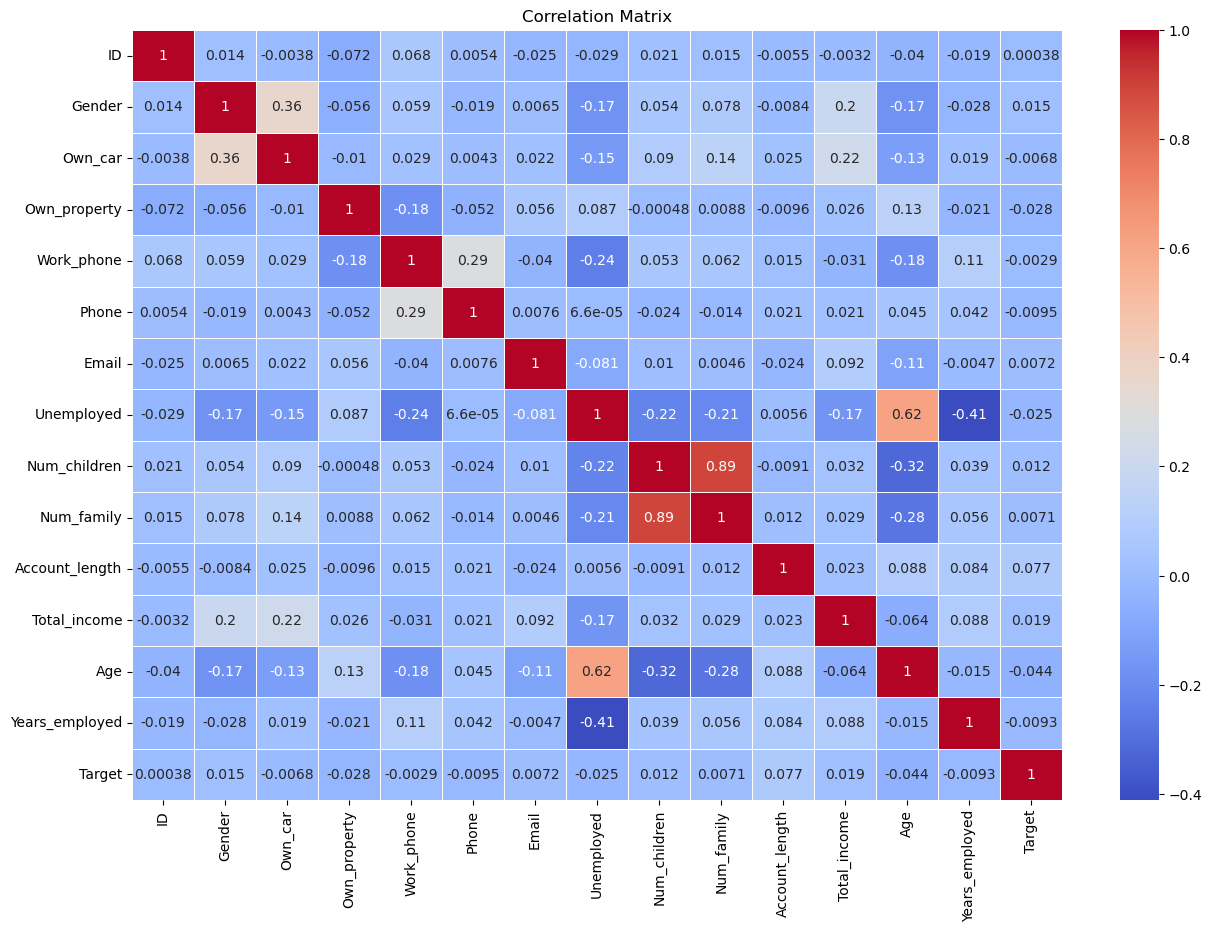

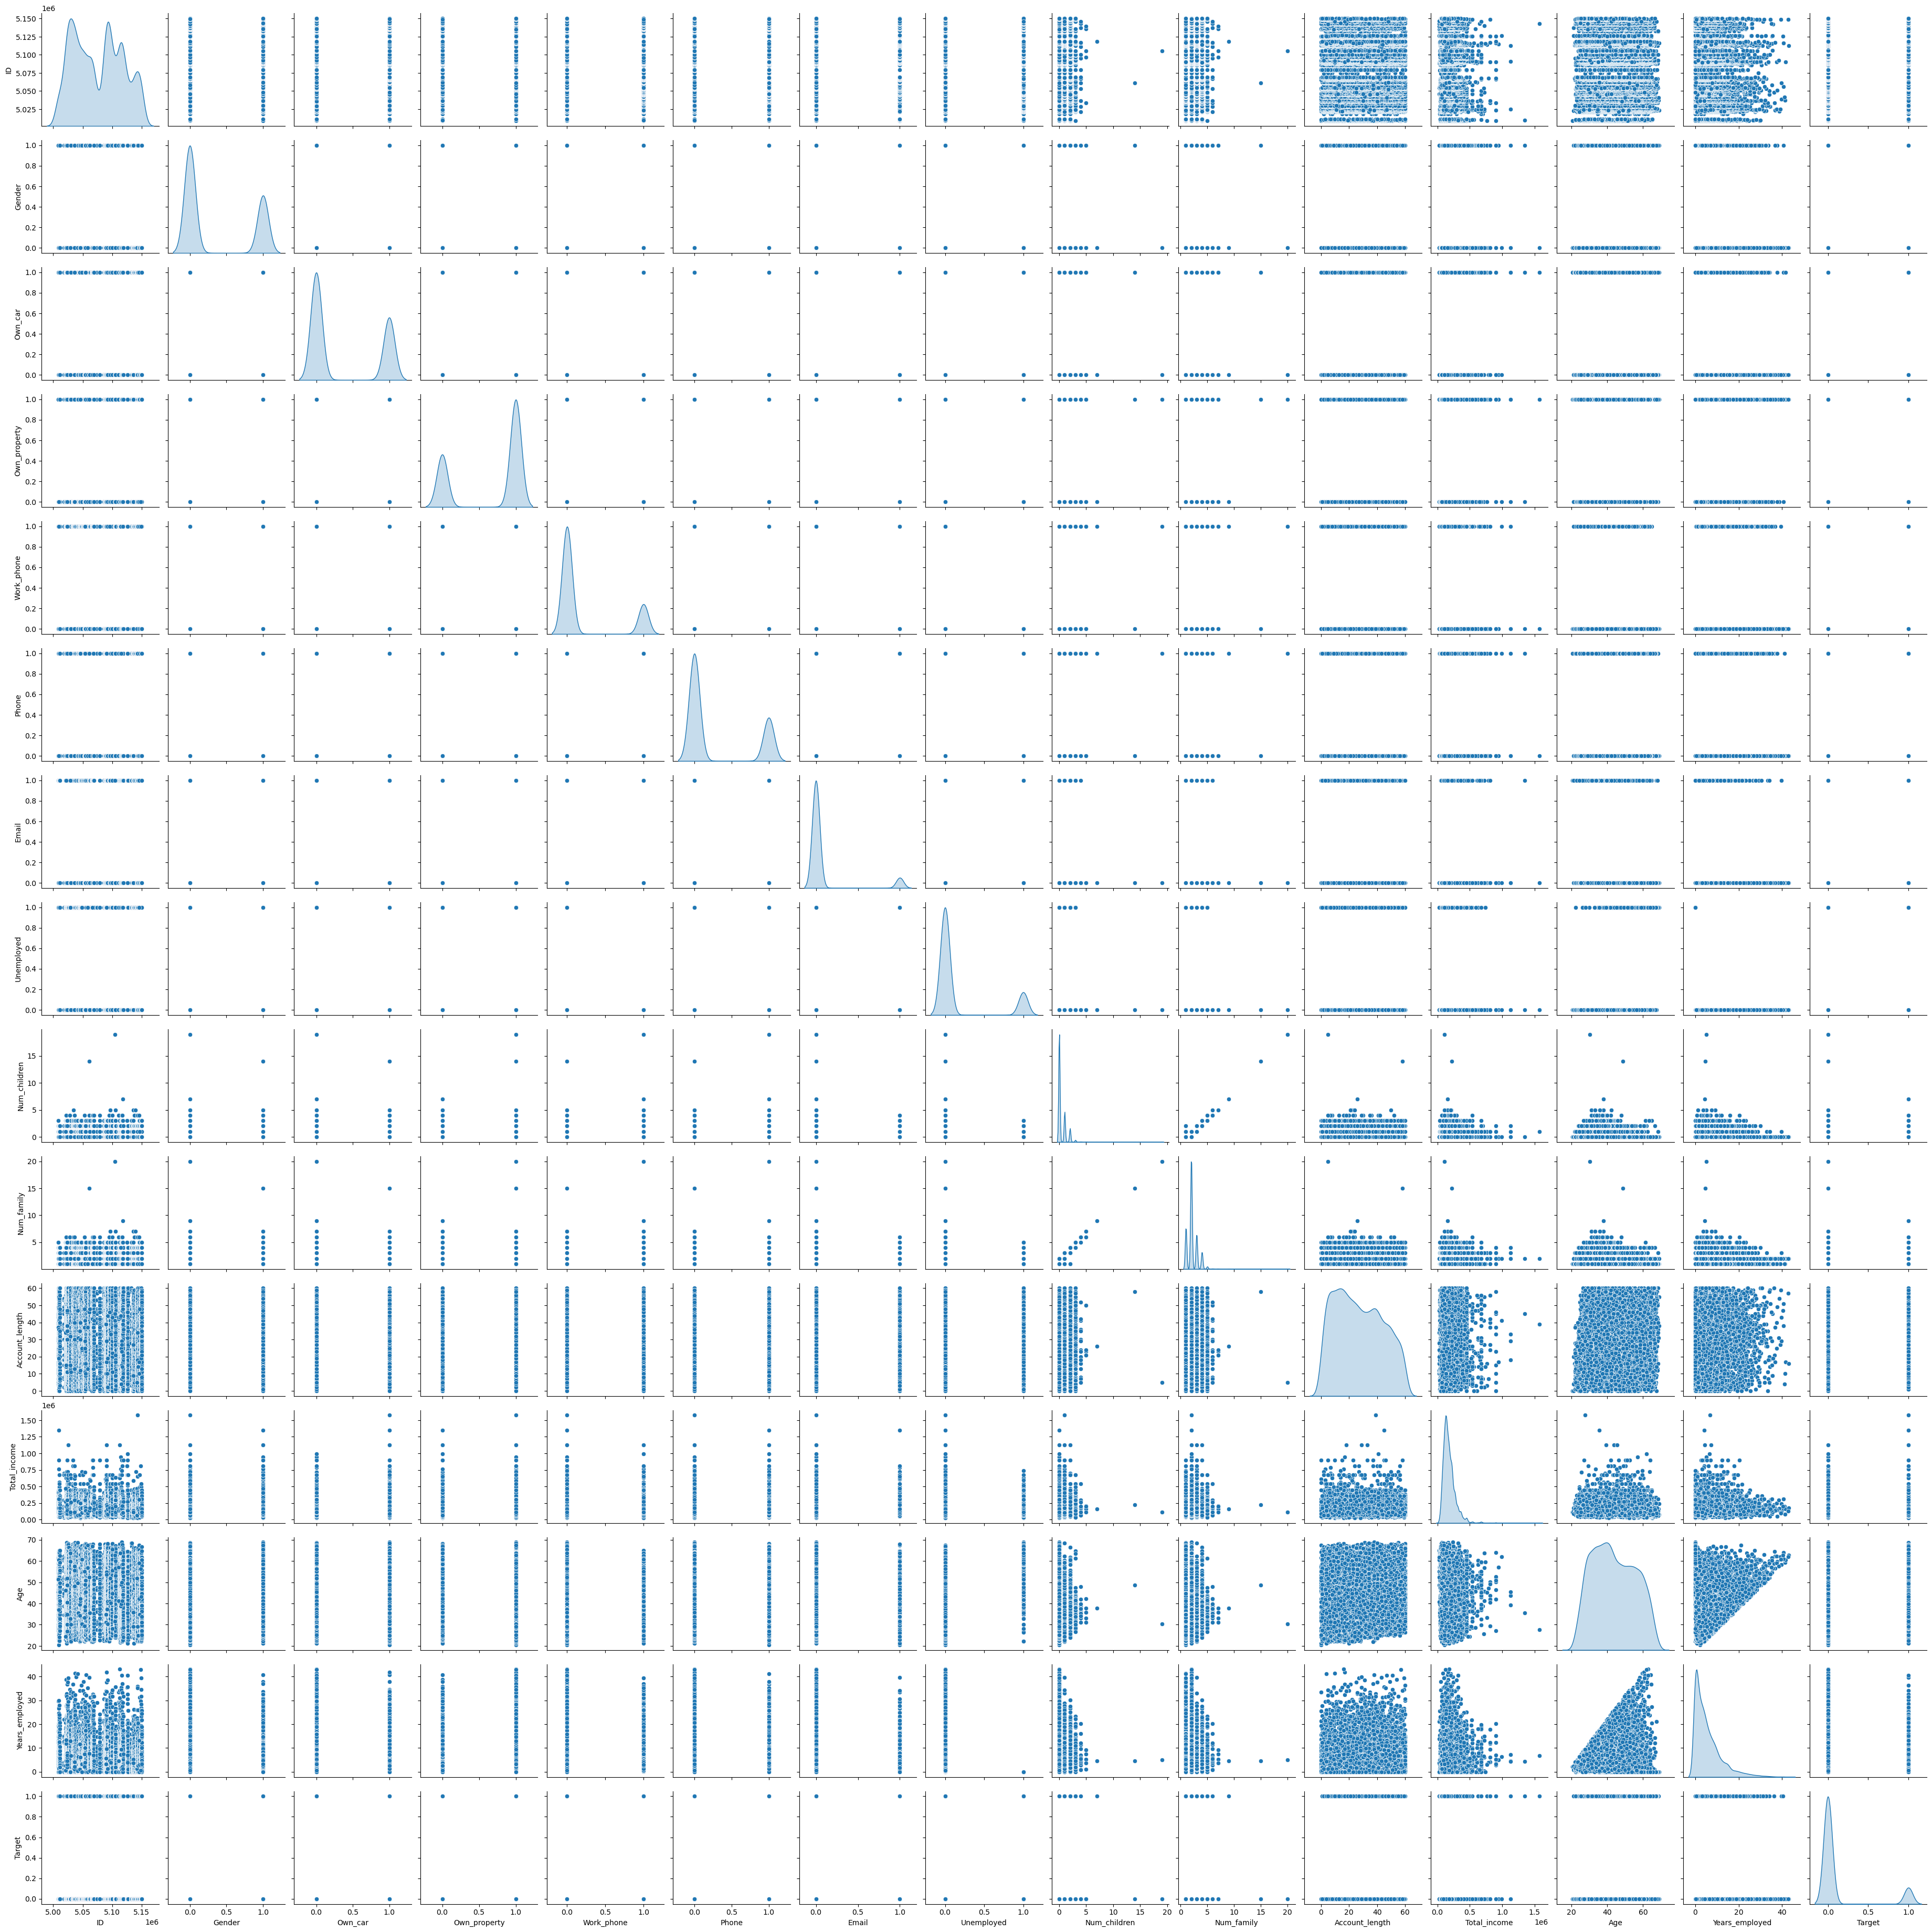

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
# Display summary statistics
#summary_statistics = df3.describe(include='all')
#print("Summary Statistics:\n", summary_statistics)

# Compute the correlation matrix
#correlation_matrix = df3.corr()

# Print the correlation matrix
#print("Correlation Matrix:\n", correlation_matrix)



/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adewalerasheed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

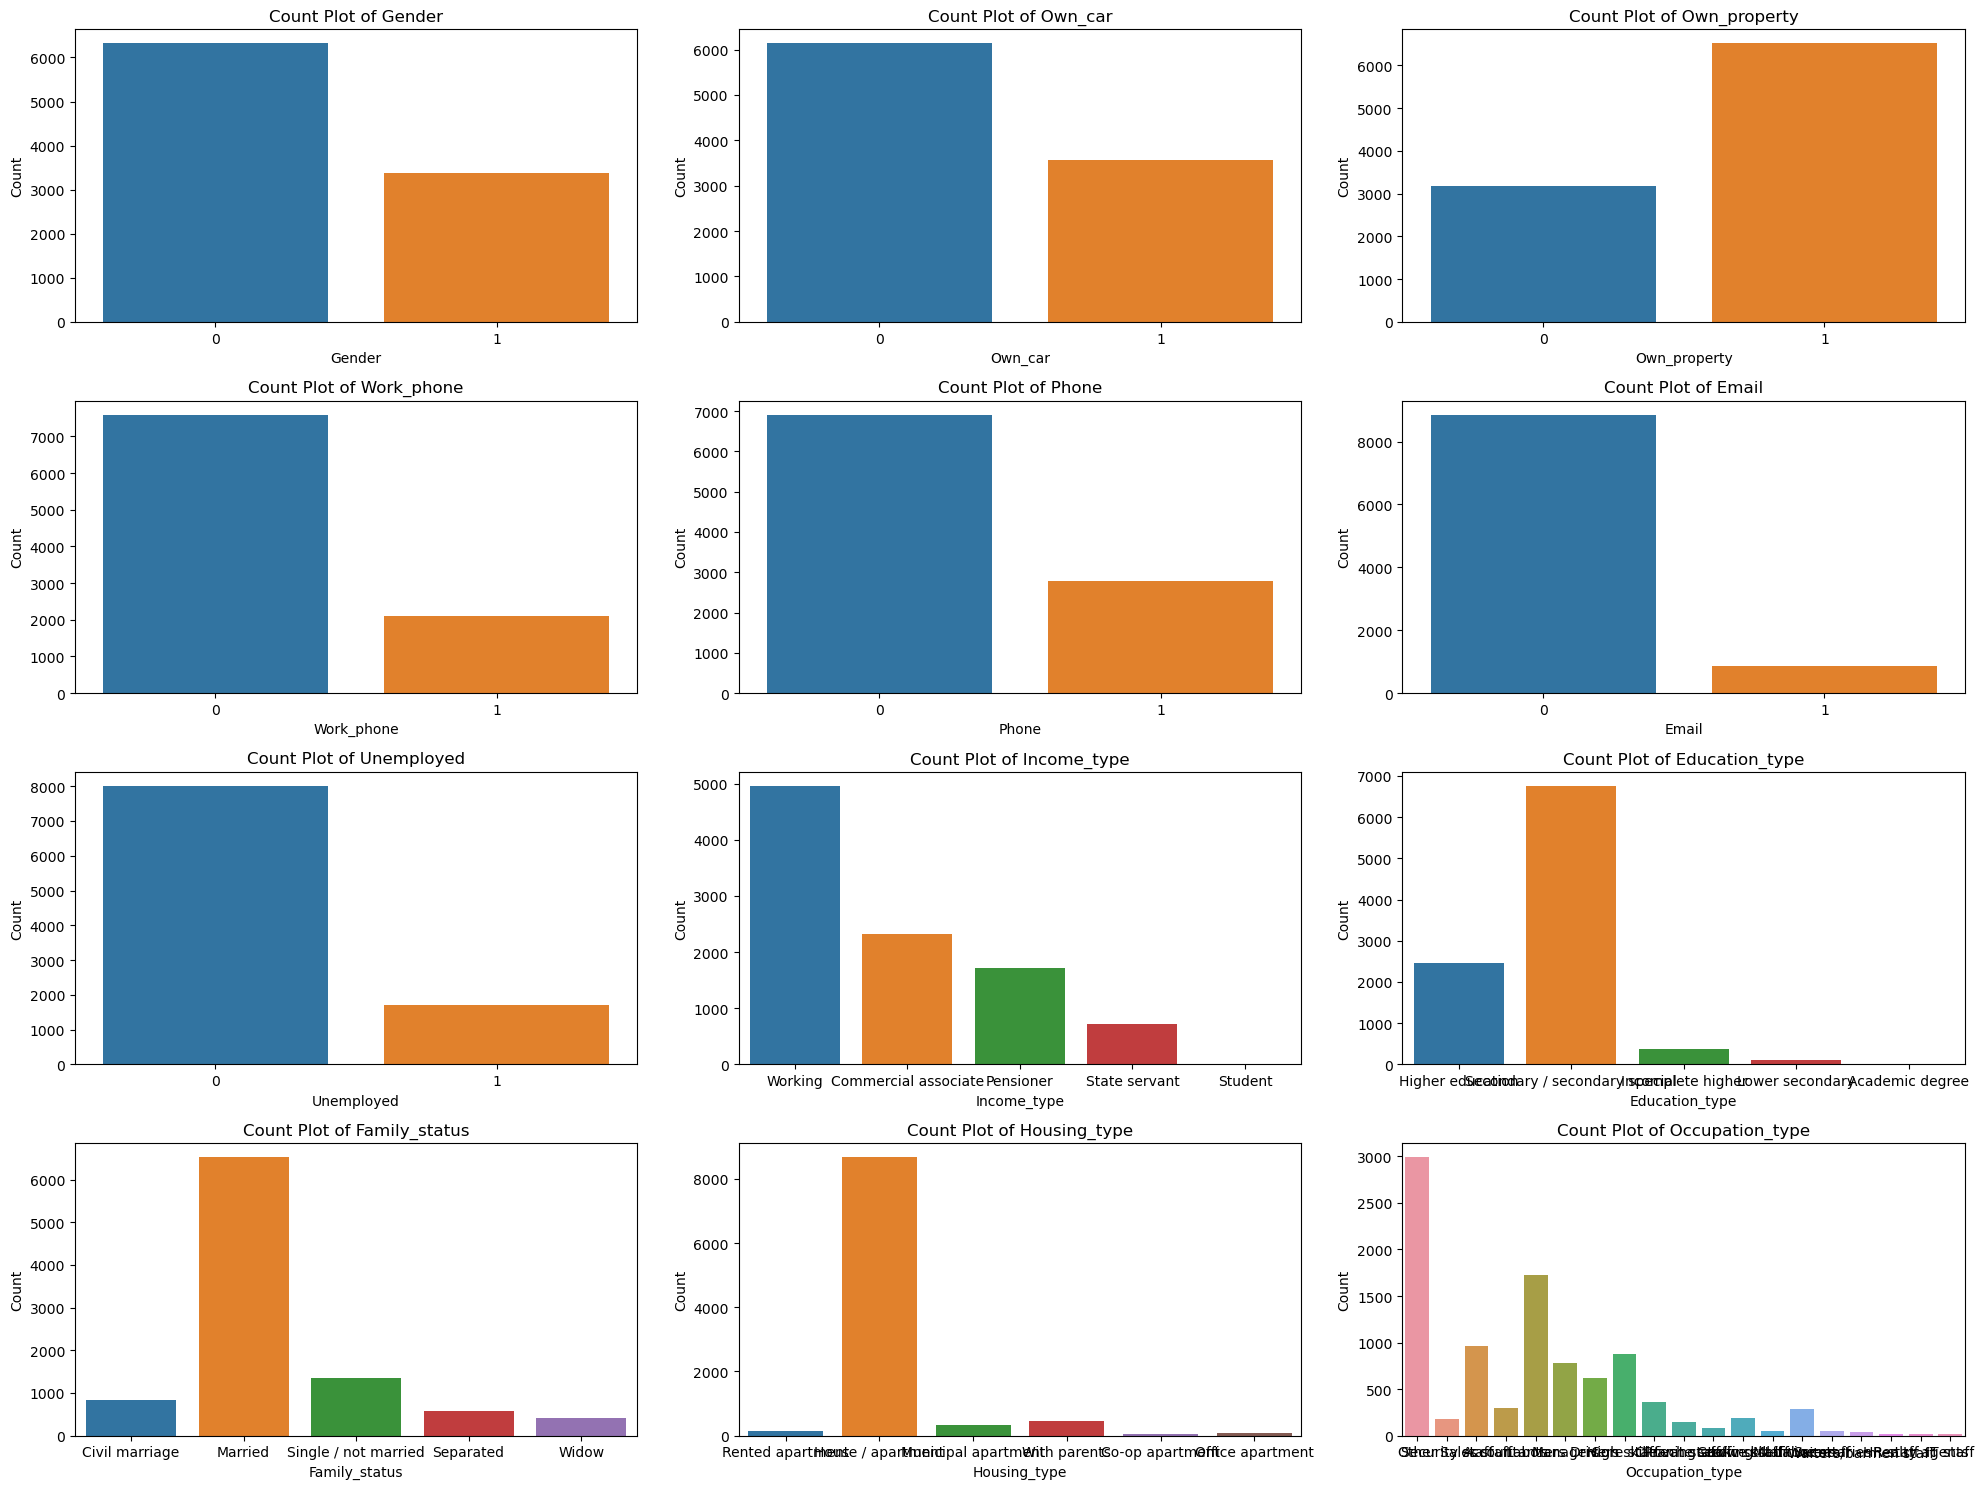

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Bar plots for categorical features
categorical_features = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 
                        'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
# # Select only numerical features
# numerical_features = df3.select_dtypes(include=['int64', 'float64'])


# # Create a pair plot
# sns.pairplot(numerical_features)
# #plt.suptitle('Numerical Variable Pair Plot', y=1.02)  # Adjust the title position
# plt.show()

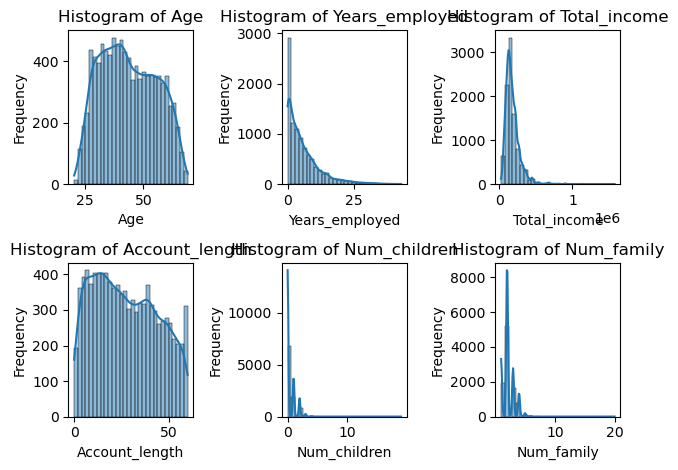

In [14]:
# Histograms for numerical features
numerical_features = ['Age', 'Years_employed', 'Total_income', 'Account_length', 'Num_children', 'Num_family']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



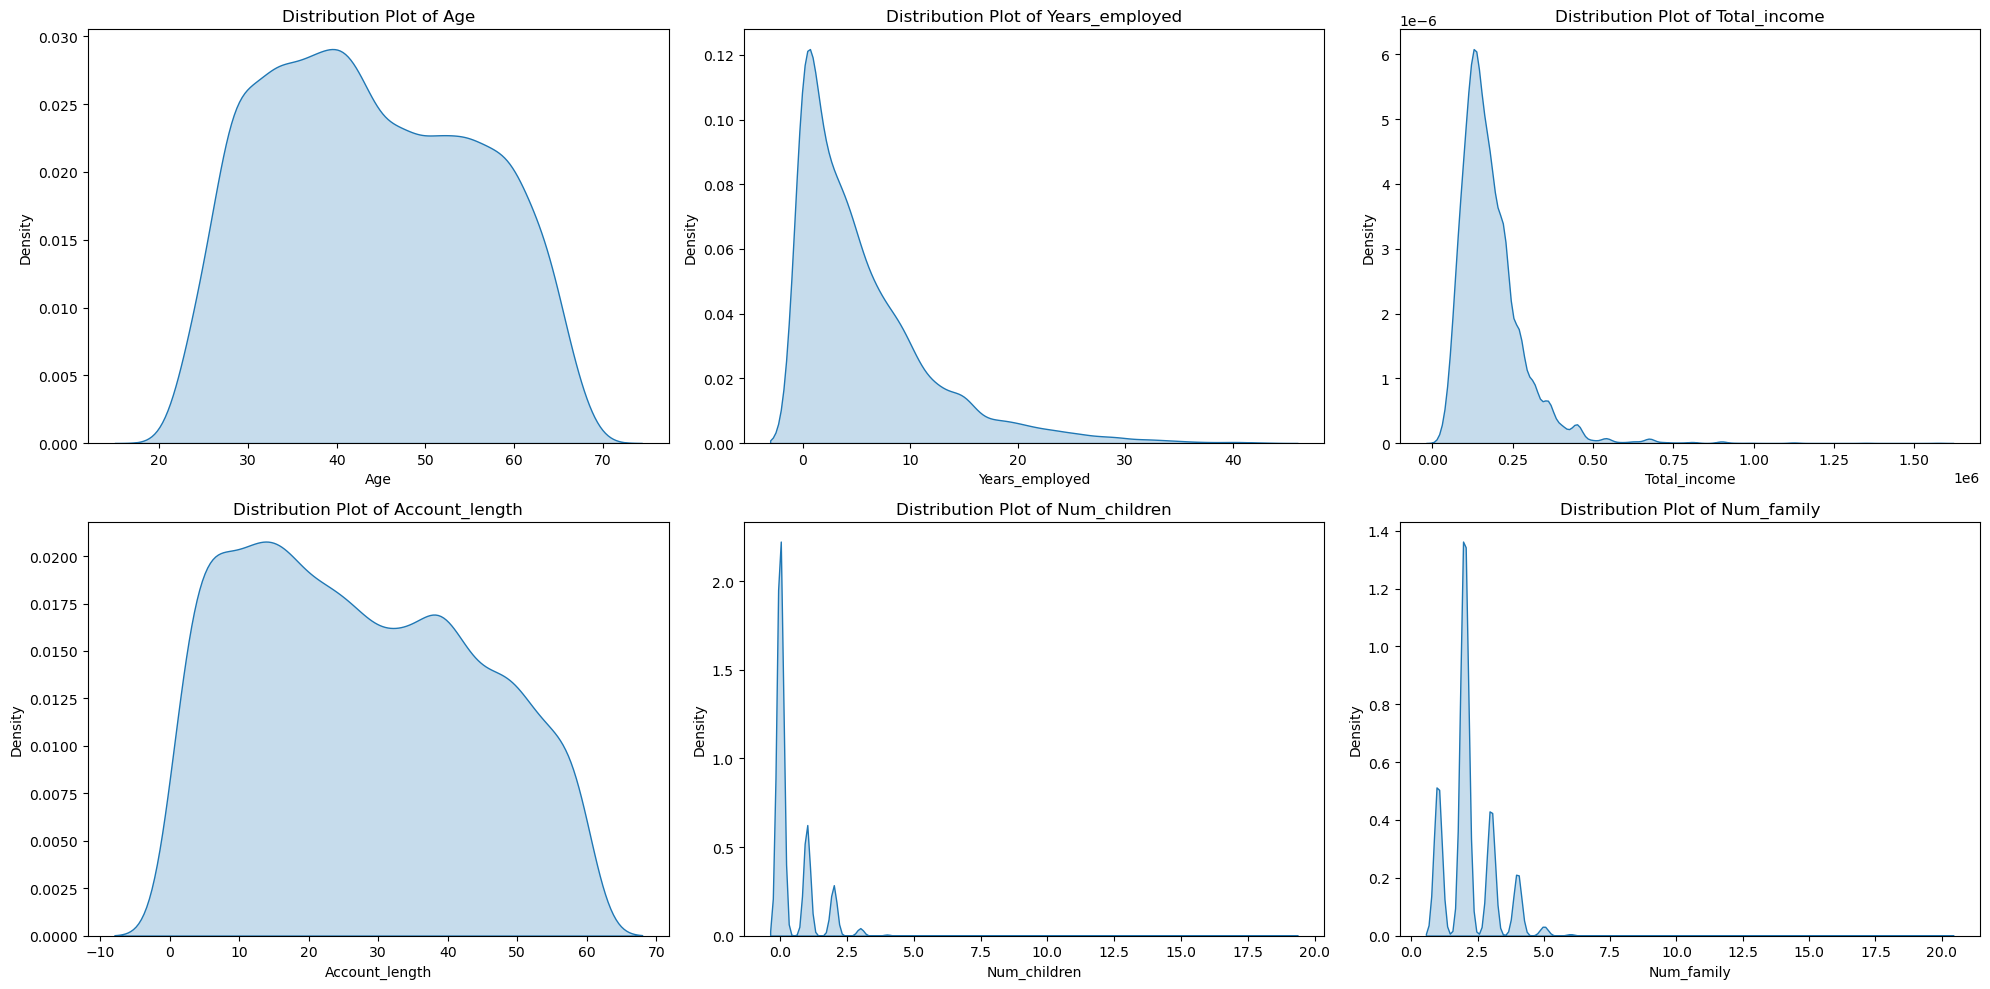

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Distribution plots for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Distribution Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [16]:
# Assuming 'Target' is the target variable and the rest are features
target = 'Target'
features = df3.drop(columns=[target])

In [17]:
# Handle missing values if any (assuming mean imputation for simplicity)
features = features.fillna(features.mean())

In [18]:
# Encode categorical variables
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])


In [19]:
# Split the data into features and target variable
# X = features
# y = df2[target]

# Separate features and target
X = df.drop(columns=['ID', 'Target'])
y = df['Target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply transformations to the data
X_preprocessed = preprocessor.fit_transform(X)

# Split data into training and testing sets (80/20 split)
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# X_train.shape, X_test.shape

In [20]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape



((7767, 53), (1942, 53))

In [21]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [22]:
# Initialize models
# logistic_regression = LogisticRegression()
# decision_tree = DecisionTreeClassifier()
# naive_bayes = GaussianNB()

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Stratified Cross-Validation setup
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Training and evaluation of models
model_results = {}
for model_name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_cv, scoring='accuracy')
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    model_results[model_name] = {
        "cv_scores": cv_scores,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }

    

# Display the results
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)
print(classification_report(y_test, y_pred))



    
    
#model_results 

                                                             cv_scores  \
Decision Tree        [0.7767052767052767, 0.7425997425997426, 0.752...   
Naive Bayes          [0.1866151866151866, 0.15572715572715573, 0.77...   
Logistic Regression  [0.8693693693693694, 0.8687258687258688, 0.868...   

                             confusion_matrix  \
Decision Tree        [[1415, 270], [201, 56]]   
Naive Bayes          [[1354, 331], [196, 61]]   
Logistic Regression     [[1685, 0], [253, 4]]   

                                                 classification_report  
Decision Tree                      precision    recall  f1-score   ...  
Naive Bayes                        precision    recall  f1-score   ...  
Logistic Regression                precision    recall  f1-score   ...  
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1685
           1       1.00      0.02      0.03       257

    accuracy                           0.87      1

In [23]:
# Time Series Cross-Validation setup
tscv = TimeSeriesSplit(n_splits=5)

# Collecting Time Series Cross-Validation scores
tscv_results = {}
for model_name, model in models.items():
    tscv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='accuracy')
    tscv_results[model_name] = tscv_scores.mean()

tscv_results

{'Decision Tree': 0.759969088098918,
 'Naive Bayes': 0.1491499227202473,
 'Logistic Regression': 0.8700154559505411}

In [24]:
# Create a synthetic imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2, 
                           n_redundant=10, n_clusters_per_class=1, 
                           weights=[0.87, 0.13], flip_y=0, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model using RandomForestClassifier with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate and display classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       526
     Class 1       1.00      0.96      0.98        74

    accuracy                           0.99       600
   macro avg       1.00      0.98      0.99       600
weighted avg       1.00      0.99      0.99       600



In [25]:
 # Function to calculate demographic parity
def demographic_parity(y_true, y_pred, protected_attribute):
    positive_protected = sum((y_pred == 1) & (protected_attribute == 1)) / sum(protected_attribute == 1)
    positive_non_protected = sum((y_pred == 1) & (protected_attribute == 0)) / sum(protected_attribute == 0)
    return positive_protected, positive_non_protected


 # Function to calculate disparate impact
def disparate_impact(positive_protected, positive_non_protected):
     return positive_protected / positive_non_protected


# Assuming 'Gender' is the protected attribute with 1 for male and 0 for female
protected_attribute = df['Gender']


# Calculate fairness metrics for each model
fairness_results = {}
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    
    
  # Ensure y_test and protected_attribute_test are aligned with y_pred
    y_test_aligned = pd.Series(y_test)  # Convert y_test to a pandas Series
    protected_attribute_test = protected_attribute.loc[y_test_aligned.index]  # Aligning with y_test index
    
    
    
    # Calculate demographic parity and disparate impact
    positive_protected, positive_non_protected = demographic_parity(y_test_aligned, y_pred, protected_attribute_test)
    disparate_impact_ratio = disparate_impact(positive_protected, positive_non_protected)
    
    
    
#     # Calculate demographic parity and disparate impact
#     positive_protected, positive_non_protected = demographic_parity(y_test, y_pred, protected_attribute)
#     disparate_impact_ratio = disparate_impact(positive_protected, positive_non_protected)
    
    # Store the results
    fairness_results[model_name] = {
        'Positive Rate (Protected)': positive_protected,
        'Positive Rate (Non-Protected)': positive_non_protected,
        'Disparate Impact Ratio': disparate_impact_ratio
    }

# Display the fairness results
fairness_df = pd.DataFrame(fairness_results).T
print(fairness_df)


                     Positive Rate (Protected)  Positive Rate (Non-Protected)  \
Decision Tree                         0.129187                       0.112532   
Naive Bayes                           0.143541                       0.132992   
Logistic Regression                   0.133971                       0.112532   

                     Disparate Impact Ratio  
Decision Tree                      1.147999  
Naive Bayes                        1.079315  
Logistic Regression                1.190518  
